In [118]:
dut.disconnect()

Serial port disconnected.


In [ ]:
dut.ground_PIC()

In [96]:
dut.power_off()

In [119]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)

In [120]:
dut.power_on()

Calibrate all 12 ADCs on A0

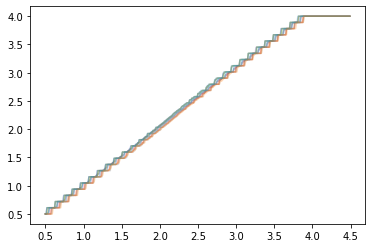

In [124]:
for addr_fifo in range(12):
    volt_in = np.arange(0.5, 4.5, 0.01)
    data = dut.calibrate_adc(volt_in, addr_fifo=addr_fifo )
    volt_out = [dut.adc2volt(d) for d in data]

    plt.plot(volt_in, volt_out, '-', alpha=0.3)

In [103]:
drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])
drv.gpio_pin_reset(*PIC_PINS['READ_BIT'])
dut.pads_defaults()

dut.scan_tia( BitArray('0b1100000100'*96).bytes )

dut.load_vectors_rows_to_zero()
dut.load_vectors_cols_to_zero()


drv.gpio_array_en_write(0b100)
drv.gpio_pin_set(*PIC_PINS['COL_ROW_SEL'])
drv.gpio_row_col_bank_write(0b0001)
drv.gpio_row_col_data_write(0b1000_0000_0000_0000)
time.sleep(1e-5)
drv.gpio_pin_set(*PIC_PINS['LATCH_CLK_DATA'])
time.sleep(1e-5)
drv.gpio_pin_reset(*PIC_PINS['LATCH_CLK_DATA'])

dut.reset_dpe()
dut.py_logic_analyzer()

1 	PWR_GOOD
1 	NRESET_FULL_CHIP
1 	NRESET_DPE_ENGINE
0 	ARRAY_EN<0>
0 	ARRAY_EN<1>
1 	ARRAY_EN<2>
0 	NFORCE_SAFE0
0 	NFORCE_SAFE1
0 	NFORCE_SAFE2
0 	ADC_SEL_EXT
0 	DPE_EXT_OVERRIDE_EN
0 	DPE_EXT_SH
1 	ADC_DONE
0 	ADC_FIFO_ADVANCE
0 	ADC_FIFO_EN<0>
0 	ADC_FIFO_EN<1>
0 	ADC_FIFO_EN<2>
0 	ADC_FIFO_EN<3>


In [163]:
dut.reset_dpe()

drv.gpio_pin_set(*PIC_PINS['WRITE_SEL_EXT'])
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_OVERRIDE_EN'])                 
time.sleep(5e-6)   
drv.gpio_nforce_safe_write(0b111)
time.sleep(5e-6)        # delay(t_cal_start), min = 2TCK
drv.gpio_pin_set(*PIC_PINS['COL_WRITE_CONNECT'])
time.sleep(5e-6)        # delay(t_opamp), min = 500ns
drv.gpio_pin_set(*PIC_PINS['CONNECT_TIA'])
#drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

In [164]:
# Before setting this, we're using an external current source to apply to the board!
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

In [71]:
n_adc = 2

data = dut.download_fifo( n_adc )

for d in data:
    print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    
# drv.gpio_adc_fifo_en_write(n_adc)

# for strobe in range(15):
#     drv.gpio_pin_set(*PIC_PINS['ADC_FIFO_ADVANCE'])
#     drv.gpio_pin_reset(*PIC_PINS['ADC_FIFO_ADVANCE'])
#     data = drv.gpio_adc_read()
#     print(f'{data:013b}', end='\t')
#     #print(strobe)
#     print( f'{dut.adc2volt(data):.3f} V' )
# print()

0110001000000 -> 0.719
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0111101110111 -> 3.535
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000001000 -> 0.527
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500


In [165]:
for n_adc in range(12):
    data = dut.download_fifo( n_adc )

    print(f'fifo #{n_adc}')
    for d in data:
        print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    print()

fifo #0
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000100000 -> 0.609
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500

fifo #1
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500

fifo #2
0100001000000 -> 0.719
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
01000000

---------NEW CALIBRATION WITH ZHAN'S MAPPING=---------

In [ ]:
drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])
drv.gpio_pin_reset(*PIC_PINS['READ_BIT'])
dut.pads_defaults()

dut.scan_tia( BitArray('0b1100000100'*96).bytes )

dut.load_vectors_rows_to_zero()
dut.load_vectors_cols_to_zero()



In [ ]:
en_col = 0
en_array = 0
en_row = 0

col_bank, 

In [ ]:
drv.gpio_array_en_write(0b010)
drv.gpio_pin_set(*PIC_PINS['COL_ROW_SEL'])
drv.gpio_row_col_bank_write(0b0001)
drv.gpio_row_col_data_write(0b1000_0000_0000_0000)
time.sleep(1e-5)
drv.gpio_pin_set(*PIC_PINS['LATCH_CLK_DATA'])
time.sleep(1e-5)
drv.gpio_pin_reset(*PIC_PINS['LATCH_CLK_DATA'])

dut.reset_dpe()

In [162]:
drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])
drv.gpio_pin_reset(*PIC_PINS['READ_BIT'])
dut.pads_defaults()

dut.scan_tia( BitArray('0b1100000100'*96).bytes )

data = dut.data_generate_sparse([59, 5, 59, 7])
dut.load_vectors(array=2, data=data)

1
0
2
12288
4
0
8
0


In [143]:
dut.py_logic_analyzer()

1 	PWR_GOOD
1 	NRESET_FULL_CHIP
1 	NRESET_DPE_ENGINE
0 	ARRAY_EN<0>
0 	ARRAY_EN<1>
0 	ARRAY_EN<2>
0 	NFORCE_SAFE0
0 	NFORCE_SAFE1
0 	NFORCE_SAFE2
0 	ADC_SEL_EXT
0 	DPE_EXT_OVERRIDE_EN
0 	DPE_EXT_SH
1 	ADC_DONE
0 	ADC_FIFO_ADVANCE
0 	ADC_FIFO_EN<0>
0 	ADC_FIFO_EN<1>
0 	ADC_FIFO_EN<2>
0 	ADC_FIFO_EN<3>
